In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg' 
# %config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_titanic():
    """
    Загружает данные Титаника и возвращает с виде одного датасета 
    с признаком is_test и данные выживания для тестовой выборки
    """
    X_train = pd.read_csv('titanic/train.csv')
    X_test = pd.read_csv('titanic/test.csv')
    X_train['is_test'] = 0
    X_test['is_test'] = 1    
    y_train = X_train.Survived
    X_train.drop('Survived', axis=1, inplace=True)
    return pd.concat([X_train, X_test]), y_train

## Исследуем данные

In [3]:
X, y_train = load_titanic()
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
is_test        1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


**Есть незаполненные колонки**
 - Возраст (Age): 263
 - Порт посадки (Embarked): 2
 - Номер каюты (Cabin): 1104
 - Стоимость (Fare): 1

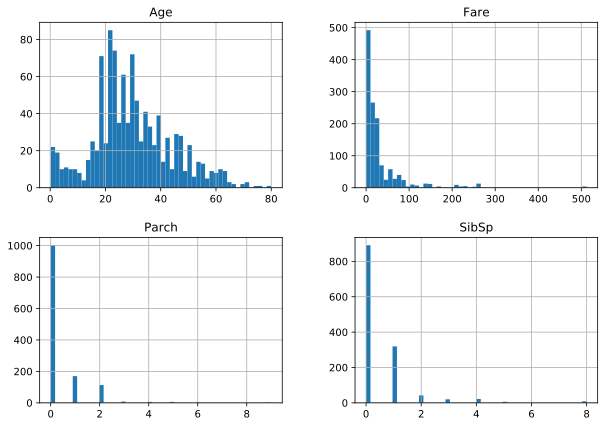

In [6]:
X[['Age', 'SibSp', 'Parch', 'Fare']].hist(bins=50, figsize=(10,7));

 - Колонка стоимость (Fare) содержит 0. Видимо стоит это расценивать как n/a и заполнять
 - Стоимость можно разделить на 4 категории < 100, 100-200, > 200-500 и > 500

In [7]:
X[X.Fare == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0
277,278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
633,634,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0


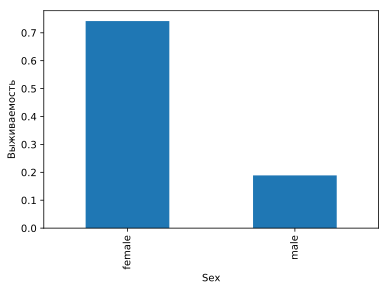

In [8]:
# Выживаемость по полу
def plot_survived_by_feature(feature):
    data = X.copy()  # Дублируем текущие данные
    data['feature'] = data[feature]  # Добавляем колонку с фичей
    data = data[data.is_test == 0]  # Оставляем только тренировочные данные
    data['Survived'] = y_train  # Возвращаем коонку выживаемости
    ax = data.groupby('feature')['Survived'].mean().plot(x='feature', kind='bar')
    ax.set_xlabel(feature)
    ax.set_ylabel('Выживаемость')

plot_survived_by_feature('Sex');

In [9]:
# Выделяем звания в именах
get_title = lambda name: name.split(',')[1].split('.')[0].strip()
X['Title'] = X.Name.map(get_title)
X.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Capt              1
Mme               1
the Countess      1
Don               1
Jonkheer          1
Sir               1
Dona              1
Name: Title, dtype: int64

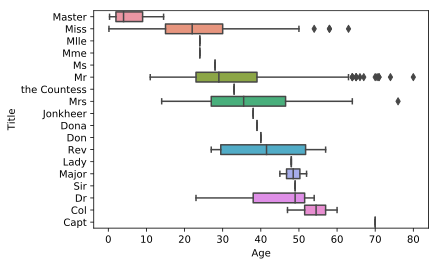

In [10]:
# Смотрим как связаны звания с возрастом
age_median_by_title = X.groupby('Title')['Age'].median()
X_ = X.copy()
X_['age_medivan_by_title'] = X_.Title.map(lambda title: age_median_by_title[title])
X_.sort_values('age_medivan_by_title', inplace=True)

sns.boxplot(x=X_.Age, y=X_.Title);

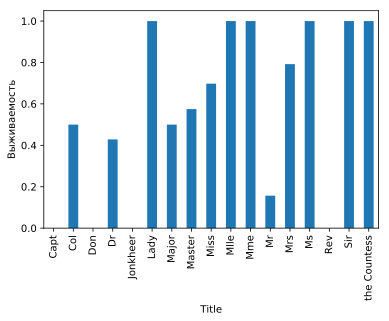

In [11]:
# Выживаемость по званиям
plot_survived_by_feature('Title');

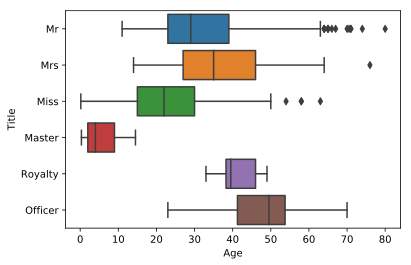

In [12]:
# Объединяем звания
titles_map = {
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",   
    "Lady" :       "Royalty", 
    "Dona":        "Royalty",    
    "the Countess":"Royalty",
    
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",    
    "Dr":         "Officer",
    "Rev":        "Officer",

    "Mr" :        "Mr",    
    
    "Mrs" :       "Mrs",        
    "Ms":         "Mrs",
    
    "Mlle":       "Miss",
    "Mme":        "Miss",
    "Miss" :      "Miss",  

    "Master" :    "Master",
}

X.Title = X.Title.map(titles_map)
sns.boxplot(x=X.Age, y=X.Title);

Можно попробовать использовать значения Master для проставления возраста

In [13]:
X[(pd.isnull(X.Age)) & (X.Title == 'Master')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test,Title
65,66,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,0,Master
159,160,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0,Master
176,177,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,Master
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,0,Master
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,Master
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,1,Master
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,1,Master
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1,Master


In [14]:
X[X.Title == 'Master'].Age.median()

4.0

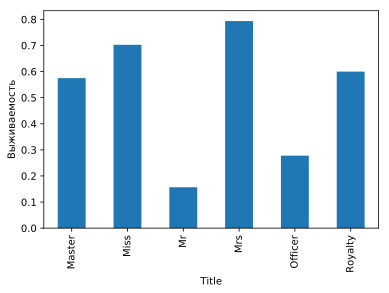

In [15]:
# Выживаемость по званиям
plot_survived_by_feature('Title');

Выжили женщины, дети и знать. Потом служащие. Простые мужики — нет.

In [16]:
master_median = X[X.Title == 'Master'].Age.median()
def fill_age(row):
    if not pd.isnull(row.Age):
        return row.Age
    if row.Title == 'Master':
        return master_median
    return row.Age
X.Age = X.apply(fill_age, axis=1)
X[(pd.isnull(X.Age))].count()

PassengerId    255
Pclass         255
Name           255
Sex            255
Age              0
SibSp          255
Parch          255
Ticket         255
Fare           255
Cabin           23
Embarked       255
is_test        255
Title          255
dtype: int64

In [17]:
# Самый популярный порт посадки, чтобы заполнить 2 отсутствующих
X.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

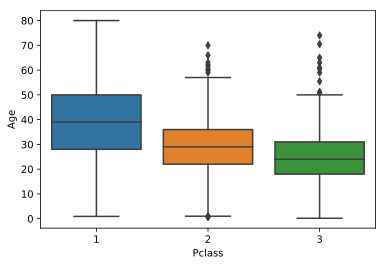

In [18]:
# Связь класса с возрастом
sns.boxplot(y=X.Age, x=X.Pclass);

Чем выше класс тем больше средний возраст. Можно использовать это при заполнении пустых ячеек Age

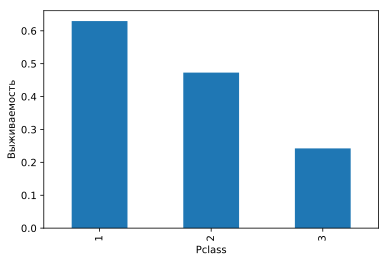

In [19]:
# Выживаемость в зависимости от класса
plot_survived_by_feature('Pclass');

Первый класс живучее

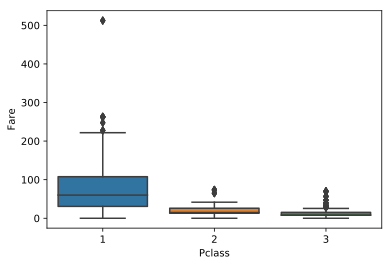

In [20]:
# Смотрим как связаны номер класса с ценой
sns.boxplot(x=X.Pclass, y=X.Fare);

In [21]:
# Размер семьи
X['FamilySize'] = X.SibSp + X.Parch + 1

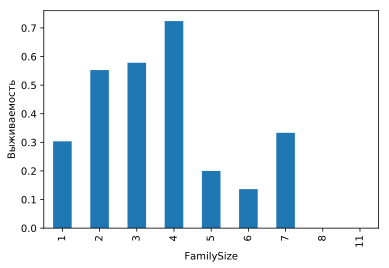

In [22]:
# Выживаемость в зависимости размера семьи
plot_survived_by_feature('FamilySize');

Одиночки и большие семьи выживают хуже. Можно добавить отдельно признак «Одиночка»

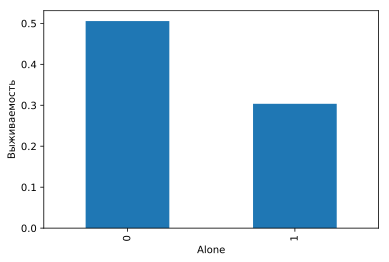

In [23]:
X['Alone'] = X.FamilySize.map(lambda size: 1 if size == 1 else 0)
plot_survived_by_feature('Alone');

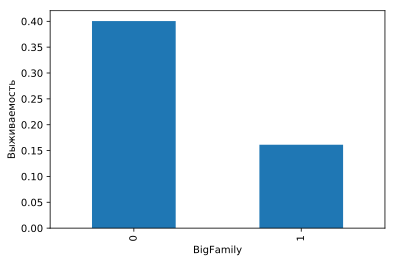

In [24]:
X['BigFamily'] = X.FamilySize.map(lambda size: 1 if size > 4 else 0)
plot_survived_by_feature('BigFamily');

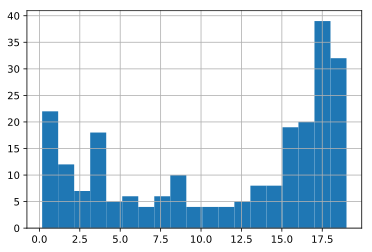

In [25]:
X.Age[X.Age < 20].hist(bins=19);

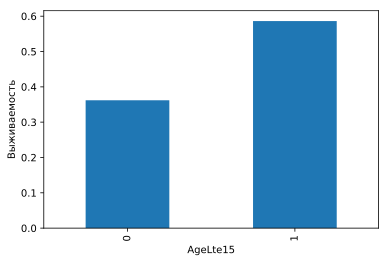

In [26]:
X['AgeLte15'] = X.Age.map(lambda age: int(age <= 15))
plot_survived_by_feature('AgeLte15');

In [27]:
# Средняя цена по классу
fare_by_pclass = X.groupby("Pclass")["Fare"].median()
fare_by_pclass

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [28]:
# Заполняем пустые ячейки цены средними по классу
X.Fare = X.Fare.map(lambda fare: fare if fare else float('nan'))
X.Fare = X.apply(
    lambda row: row.Fare if not pd.isnull(row.Fare) else fare_by_pclass[row.Pclass],
    axis=1
)

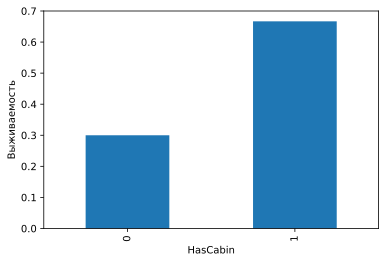

In [29]:
# Есть ли каюта
X['HasCabin'] = X.Cabin.notnull().astype(int)
plot_survived_by_feature('HasCabin');

Без каюты кажется выживают реже. Хотя не известно что означает пропуск в этой ячейке.

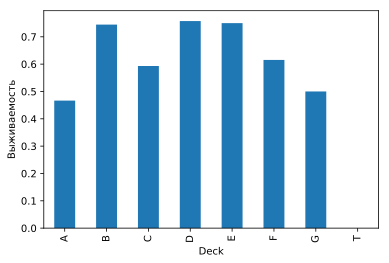

In [30]:
# Палуба на основании каюты
X['Deck'] = X.Cabin.map(lambda cabin: cabin if pd.isnull(cabin) else cabin[0])
plot_survived_by_feature('Deck');

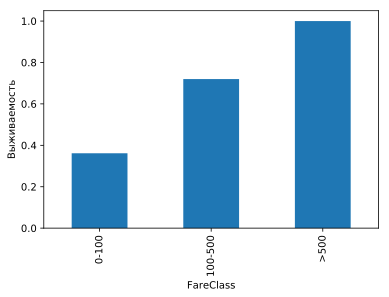

In [31]:
# Разделим цену на 3 класса
def get_fare_class(fare):
    if pd.isnull(fare):
        return fare
    if fare < 100: return '0-100'
    if fare < 500: return '100-500'
    return '>500'
X['FareClass'] = X.Fare.map(get_fare_class)
plot_survived_by_feature('FareClass');

In [32]:
# Длина имени
X['NameLen'] = (X.Name.str.len() / 10).astype(int)
X.NameLen.value_counts()

2    639
1    292
3    224
4    109
5     38
6      6
8      1
Name: NameLen, dtype: int64

2    639
1    292
3    224
4    154
Name: NameLen, dtype: int64


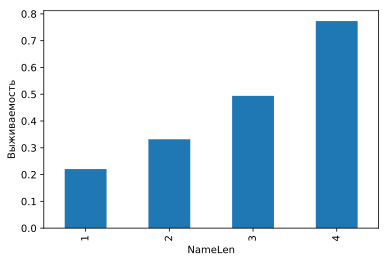

In [33]:
X.NameLen = X.NameLen.where(X.NameLen < 4, 4)
print(X.NameLen.value_counts())
plot_survived_by_feature('NameLen');

Корреляция с выживаемостью есть, пусть останется

In [50]:
def get_title(name): 
    return name.split(',')[1].split('.')[0].strip()

# Объединяем звания
titles_map = {
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",   
    "Lady" :       "Royalty", 
    "Dona":        "Royalty",    
    "the Countess":"Royalty",
    
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",    
    "Dr":         "Officer",
    "Rev":        "Officer",

    "Mr" :        "Mr",    
    
    "Mrs" :       "Mrs",        
    "Ms":         "Mrs",
    
    "Mlle":       "Miss",
    "Mme":        "Miss",
    "Miss" :      "Miss",  

    "Master" :    "Master",
}

def clean_data(X, silent=False):
    """Очищает исхожные данные и кодирует нечисловые значения"""
    _log = print if not silent else lambda *args: args
    
    # Сохраняем ID пассажира для создания файла с ответами для постинга на Kaggle
    # и is_test для последующего разделения датасета на тестовый и тренировочный
    # в отдельных pd.Series и удаляем эти колонки из датасета
    PassengerId = X[X.is_test == 1].PassengerId
    is_test = X.is_test
    X = X.drop(['is_test', 'PassengerId'], axis=1)
    
    # Пол
    _log('\n------Sex')
    _log(X.Sex.value_counts())     
    X.Sex = X.Sex.map({"male": 1, "female":0})
    
    # Обращение
    X['Title'] = X.Name.map(get_title).map(titles_map)
    _log('\n------Titles')
    _log(X.Title.value_counts())
    
    # Возраст. Если не Master, берём медиану по полу и классу
    age_master = X[X.Title == 'Master'].Age.median()
    age_by_pclass_and_sex = X.groupby(["Pclass", "Sex"])["Age"].median()
    def fill_age(row):
        if not pd.isnull(row.Age):
            return row.Age
        if row.Title == 'Master':
            return age_master
        return age_by_pclass_and_sex[row.Pclass][row.Sex]
    
    X.Age = X.apply(fill_age, axis=1)
    X['AgeLte15'] = X.Age.map(lambda age: int(age <= 15))   
        
    # Стоимость (для отсутствующих значений берём медиану по классу)
    X.Fare = X.Fare.map(lambda fare: fare if fare else float('nan'))
    fare_by_pclass = X.groupby("Pclass")["Fare"].median()
    def fill_fare(row):
        if not pd.isnull(row.Fare):
            return row.Fare
        return fare_by_pclass[row.Pclass]
    X.Fare = X.apply(fill_fare, axis=1)
    
    # Класс стоимости
    def get_fare_class(fare):
        if pd.isnull(fare):
            return fare
        if fare < 100: return '0-100'
        if fare < 500: return '100-500'
        return '>500'
    X['FareClass'] = X.Fare.map(get_fare_class)     
    
    # Размер семьи
    _log('\n------FamilySize')
    X['FamilySize'] = X.SibSp + X.Parch + 1
    _log(X.FamilySize.value_counts())   
    
    # Одиночки
    _log('\n------Alone')
    X['Alone'] = X.FamilySize.map(lambda size: int(size == 1))
    _log(X.Alone.value_counts()) 
    
    # Большая семья
    _log('\n------BigFamily')    
    X['BigFamily'] = X.FamilySize.map(lambda size: int(size > 4))
    _log(X.BigFamily.value_counts())  
    
    # Класс каюты
    _log('\n------Pclass')
    _log(X.Pclass.value_counts())     
    # Помимо dummy колонок для Pclass оставим сами значения, т.к. их можно сравнивать. 
    # Только меняем порядок 0,1,2
    X['Pclass2'] = 3 - X.Pclass  
    
    # Порт посадки
    _log('\n------Embarked')
    X.Embarked = X.Embarked.fillna('S')
    _log(X.Embarked.value_counts()) 
    
    
    # Есть каюта
    _log('\n------HasCabin')
    X['HasCabin'] = X.Cabin.notnull().astype(int)
    _log(X.HasCabin.value_counts()) 
    
    # Палуба из номера каюты
    _log('\n------Deck')
    X['Deck'] = X.Cabin.map(lambda cabin: cabin if pd.isnull(cabin) else cabin[0])
    _log(X.Deck.value_counts()) 
    
    # Длина имени
    _log('\n------NameLen')
    X['NameLen'] = (X.Name.str.len() / 10).astype(int)    
    X.NameLen = X.NameLen.where(X.NameLen < 4, 4)
    _log(X.NameLen.value_counts()) 
    
    X = pd.get_dummies(X, columns=['Embarked', 'Title', 'Pclass', 'Deck', 'FareClass', 'NameLen'])

    # Удаляем номер билета, каюты и имя пассажира
    X = X.drop(['Cabin', 'Ticket', 'Name'], axis=1)
    
    return X, is_test, PassengerId

In [37]:
from sklearn.preprocessing import StandardScaler

def normalize_data(X):
    """Возвращает нормализованные значения"""
    index = X.index
    X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
    X.index = index
    return X

In [38]:
def split_data(X, is_test):
    """Разделяет данные на тренировочную и тестовую выбрки по сохранённому флагу is_test"""
    X_train = X[is_test == 0]
    X_test = X[is_test == 1]
    return X_train, X_test

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from operator import itemgetter

def tune_model(model, X, y, params, n_splits=3, scoring='accuracy', n_jobs=-1):
    """Тюнит модель и возвращает лучшую модель и [топ-5 лучших параметров]"""    
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    grid = GridSearchCV(model, params, cv=cv, scoring=scoring, refit=True, n_jobs=n_jobs)
    grid.fit(X, y)
    top_params = sorted(
        zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']), 
        key=itemgetter(1),
        reverse=True
    )
    top_5_params = list(map(itemgetter(0), top_params[:5]))
    return grid.best_estimator_, top_5_params

In [40]:
from sklearn.model_selection import cross_val_score

def get_prediction(model, X, y, X_test):
    """Тренирует модель и возвращает предсказания"""
    model.fit(X, y)
    predict = model.predict(X_test)
    predict_proba = model.predict_proba(X_test)
    return predict, predict_proba

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y, y_predict_proba):
    """Рисует кривую ROC"""
    fpr, tpr, thres = roc_curve(y, y_predict_proba[:, 1])
    plt.plot(fpr, tpr);
    plt.title('ROC: {:.3f}'.format(roc_auc_score(y, y_predict_proba[:, 1])))

In [42]:
def get_feature_importance(model, X):
    return pd.DataFrame(
        list(zip(X.columns, model.feature_importances_)),
        columns = ['feature', 'importance']
    ).set_index(
        'feature'
    ).sort_values(
        'importance', ascending=False
    )  

def get_feature_importance_bar(model, X):
    return get_feature_importance(model, X).style.bar()

In [43]:
def save_submission(file_name, PassengerId, predict):
    """Сохраняет результат в файл"""
    submussion = 'PassengerId,Survived\n'
    submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(PassengerId, predict)])
    
    with open(file_name, 'w') as file:
        file.write(submussion) 

In [44]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    """Возвращает граф дерева для graphviz"""
    return export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names)

In [48]:
X, y_train = load_titanic()

In [49]:
X, is_test, PassengerId = clean_data(X)

In [168]:
X.head()

,Sex,Age,SibSp,Parch,Fare,AgeLte15,FamilySize,Alone,BigFamily,Pclass2,...,Deck_F,Deck_G,Deck_T,FareClass_0-100,FareClass_100-500,FareClass_>500,NameLen_1,NameLen_2,NameLen_3,NameLen_4
0,1,22.0,1,0,7.2500,0,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,38.0,1,0,71.2833,0,2,0,0,2,...,0,0,0,1,0,0,0,0,0,1
2,0,26.0,0,0,7.9250,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,35.0,1,0,53.1000,0,2,0,0,2,...,0,0,0,1,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 38 columns):
Sex                  1309 non-null int64
Age                  1309 non-null float64
SibSp                1309 non-null int64
Parch                1309 non-null int64
Fare                 1309 non-null float64
AgeLte15             1309 non-null int64
FamilySize           1309 non-null int64
Alone                1309 non-null int64
BigFamily            1309 non-null int64
Pclass2              1309 non-null int64
HasCabin             1309 non-null int64
Embarked_C           1309 non-null uint8
Embarked_Q           1309 non-null uint8
Embarked_S           1309 non-null uint8
Title_Master         1309 non-null uint8
Title_Miss           1309 non-null uint8
Title_Mr             1309 non-null uint8
Title_Mrs            1309 non-null uint8
Title_Officer        1309 non-null uint8
Title_Royalty        1309 non-null uint8
Pclass_1             1309 non-null uint8
Pclass_2             1309 non

In [84]:
X, y_train = load_titanic()
X, is_test, PassengerId = clean_data(X)
X = normalize_data(X)
X_train, X_test = split_data(X, is_test)


------Sex
male      843
female    466
Name: Sex, dtype: int64

------Titles
Mr         757
Miss       263
Mrs        199
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

------FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

------Alone
1    790
0    519
Name: Alone, dtype: int64

------BigFamily
0    1227
1      82
Name: BigFamily, dtype: int64

------Pclass
3    709
1    323
2    277
Name: Pclass, dtype: int64

------Embarked
S    916
C    270
Q    123
Name: Embarked, dtype: int64

------HasCabin
0    1014
1     295
Name: HasCabin, dtype: int64

------Deck
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

------NameLen
2    639
1    292
3    224
4    154
Name: NameLen, dtype: int64


In [85]:
model = DecisionTreeClassifier(random_state=1)
params = {
    'max_depth': list(range(2, 10)),
    "min_samples_split": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4]        
}
model, best_5_params = tune_model(model, X_train, y_train, params)
print('best params:')
print("\n".join(map(str, best_5_params)))

best params:
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8}
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8}


test prediction accuracy:  0.804469273743


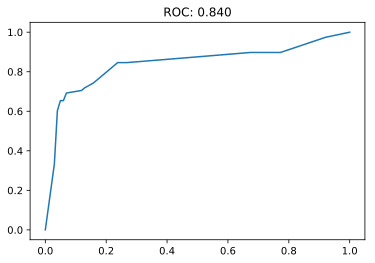

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Делим тренировочные данные на тестовые и проверочные
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2)

# Делаем предсказания для проверочных данных
y_train_test_predict, y_train_test_predict_proba = get_prediction(
    model, X_train_train, y_train_train, X_train_test
)

# Рисуем ROC-кривую и выводим accuracy score
plot_roc_curve(y_train_test, y_train_test_predict_proba)
print("test prediction accuracy: ", accuracy_score(y_train_test, y_train_test_predict))

In [87]:
y_test_predict, y_test_predict_proba = get_prediction(model, X_train, y_train, X_test)    

In [88]:
save_submission('submission.txt', PassengerId, y_test_predict)

In [89]:
get_feature_importance_bar(model, X_train)

,importance
feature,
Title_Mr,0.513365
FamilySize,0.122266
Fare,0.0608391
Title_Officer,0.0575875
Age,0.0472481
Pclass2,0.0406347
HasCabin,0.0399766
Pclass_3,0.0354962
Deck_E,0.0193617


In [90]:
X, y_train = load_titanic()
X, is_test, PassengerId = clean_data(X)
X = normalize_data(X)
X_train, X_test = split_data(X, is_test)

best_features = [
    'Fare', 'Age', 'NameLen_2', 'FamilySize', 'Embarked_S', 
    'SibSp', 'Pclass_2', 'Title_Mr', 'Pclass2', 'Parch', 'NameLen_1', 
    'HasCabin', 'Title_Miss', 'Embarked_Q', 'Sex'
]
# X_train = X_train[best_features]
# X_test = X_test[best_features]


------Sex
male      843
female    466
Name: Sex, dtype: int64

------Titles
Mr         757
Miss       263
Mrs        199
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

------FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

------Alone
1    790
0    519
Name: Alone, dtype: int64

------BigFamily
0    1227
1      82
Name: BigFamily, dtype: int64

------Pclass
3    709
1    323
2    277
Name: Pclass, dtype: int64

------Embarked
S    916
C    270
Q    123
Name: Embarked, dtype: int64

------HasCabin
0    1014
1     295
Name: HasCabin, dtype: int64

------Deck
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

------NameLen
2    639
1    292
3    224
4    154
Name: NameLen, dtype: int64


In [287]:
import xgboost
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
clf = xgboost.XGBClassifier(**{
    'base_score': 0.5,
    'colsample_bylevel': 1,
    'colsample_bytree': 0.7,
    'gamma': 0.0,
    'learning_rate': 1.0,
    'max_delta_step': 0,
    'max_depth': 5,
    'min_child_weight': 1,
    'missing': None,
    'n_estimators': 10,
    'nthread': -1,
    'objective': 'binary:logistic',
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'scale_pos_weight': 0.6229508196721312,
    'seed': 0,
    'silent': True,
    'subsample': 0.5
})

# в этой функции мы проверяем, как ведёт себя модель при заданных параметрах
def score(params):
    print("Training with params : ")
    print(params)
    params['n_estimators'] = int(params['n_estimators'])
    model = xgboost.XGBClassifier(**params)
    aucs = []
    # Для оценки качества используем KFold, который определили выше
    for train_idx, test_idx in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        clf.fit(X_train_fold, y_train_fold)
        preds = clf.predict(X_test_fold)
#         preds = clf.predict_proba(X_test_fold)
#         auc = roc_auc_score(y_test_fold, preds[:, 1])
        auc = accuracy_score(y_test_fold, preds)
        aucs.append(auc)
    auc = np.mean(auc)
    result = {'loss': auc, 'status': STATUS_OK}
    print(result)
    return result


# это наша главная функция, в которой мы задаём параметры
def optimize(trials):
    space = {
        'n_estimators' : hp.quniform('n_estimators', 100, 1000, 5), # (название параметра, от, до, шаг)
        'learning_rate' : hp.quniform('learning_rate', 0.025, 0.5, 0.025),
        'max_depth' : hp.quniform('max_depth', 1, 10, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
        'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'objective': 'reg:linear',
        'silent' : 1,
        'scale_pos_weight': hp.quniform('scale_pos_weight', 0.5, 10., 0.5),
        'reg_alpha': 0.0,
        'reg_lambda': 1.0
    }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)
    print('Best: ')
    print(best)

#сюда будет записана
trials = Trials()

optimize(trials)

Training with params : 
{'colsample_bytree': 0.9500000000000001, 'gamma': 0.8500000000000001, 'learning_rate': 0.225, 'max_depth': 6.0, 'min_child_weight': 5.0, 'n_estimators': 500.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 2.5, 'silent': 1, 'subsample': 0.6000000000000001}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.75, 'gamma': 0.8500000000000001, 'learning_rate': 0.15000000000000002, 'max_depth': 3.0, 'min_child_weight': 5.0, 'n_estimators': 565.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 4.5, 'silent': 1, 'subsample': 0.8}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.9, 'gamma': 0.9, 'learning_rate': 0.07500000000000001, 'max_depth': 7.0, 'min_child_weight': 5.0, 'n_estimators': 215.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 3.5, 'silent': 1, 'subsample': 0.

{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 1.0, 'gamma': 0.9500000000000001, 'learning_rate': 0.4, 'max_depth': 8.0, 'min_child_weight': 6.0, 'n_estimators': 120.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 1.5, 'silent': 1, 'subsample': 1.0}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.9500000000000001, 'gamma': 0.5, 'learning_rate': 0.025, 'max_depth': 4.0, 'min_child_weight': 6.0, 'n_estimators': 470.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 7.5, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.8, 'gamma': 0.8, 'learning_rate': 0.225, 'max_depth': 1.0, 'min_child_weight': 4.0, 'n_estimators': 790.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 4.0, 'silent': 1, 'subsample': 0.700000000000000

{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.8, 'gamma': 0.6000000000000001, 'learning_rate': 0.275, 'max_depth': 4.0, 'min_child_weight': 5.0, 'n_estimators': 725.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 9.0, 'silent': 1, 'subsample': 0.6000000000000001}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.75, 'gamma': 0.7000000000000001, 'learning_rate': 0.05, 'max_depth': 4.0, 'min_child_weight': 5.0, 'n_estimators': 330.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 8.0, 'silent': 1, 'subsample': 0.55}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.8, 'learning_rate': 0.2, 'max_depth': 1.0, 'min_child_weight': 4.0, 'n_estimators': 655.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 5.5, 'silent': 1,

Training with params : 
{'colsample_bytree': 0.5, 'gamma': 0.7000000000000001, 'learning_rate': 0.17500000000000002, 'max_depth': 2.0, 'min_child_weight': 4.0, 'n_estimators': 490.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 7.0, 'silent': 1, 'subsample': 0.55}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.8, 'learning_rate': 0.2, 'max_depth': 1.0, 'min_child_weight': 4.0, 'n_estimators': 810.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 4.0, 'silent': 1, 'subsample': 0.7000000000000001}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.55, 'gamma': 0.8, 'learning_rate': 0.225, 'max_depth': 5.0, 'min_child_weight': 4.0, 'n_estimators': 545.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 3.5, 'silent': 1, 'subsample': 0.7000000000000001}
{'loss': 0.8

Training with params : 
{'colsample_bytree': 0.8, 'gamma': 0.8500000000000001, 'learning_rate': 0.325, 'max_depth': 5.0, 'min_child_weight': 6.0, 'n_estimators': 350.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 6.5, 'silent': 1, 'subsample': 0.75}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.8, 'gamma': 0.7000000000000001, 'learning_rate': 0.42500000000000004, 'max_depth': 4.0, 'min_child_weight': 6.0, 'n_estimators': 315.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 9.0, 'silent': 1, 'subsample': 0.6000000000000001}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.8, 'gamma': 0.7000000000000001, 'learning_rate': 0.05, 'max_depth': 4.0, 'min_child_weight': 5.0, 'n_estimators': 710.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 9.5, 'silent': 1, 'subsample': 0.55}
{'loss': 0.

{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.7000000000000001, 'learning_rate': 0.07500000000000001, 'max_depth': 3.0, 'min_child_weight': 3.0, 'n_estimators': 395.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 5.5, 'silent': 1, 'subsample': 0.9}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.65, 'learning_rate': 0.07500000000000001, 'max_depth': 3.0, 'min_child_weight': 3.0, 'n_estimators': 420.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 7.5, 'silent': 1, 'subsample': 0.9}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.6000000000000001, 'gamma': 0.65, 'learning_rate': 0.1, 'max_depth': 3.0, 'min_child_weight': 1.0, 'n_estimators': 160.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_p

Training with params : 
{'colsample_bytree': 0.55, 'gamma': 0.9500000000000001, 'learning_rate': 0.35000000000000003, 'max_depth': 6.0, 'min_child_weight': 6.0, 'n_estimators': 555.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 1.5, 'silent': 1, 'subsample': 0.9}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.5, 'gamma': 1.0, 'learning_rate': 0.45, 'max_depth': 7.0, 'min_child_weight': 6.0, 'n_estimators': 470.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 2.5, 'silent': 1, 'subsample': 1.0}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.55, 'gamma': 0.9, 'learning_rate': 0.375, 'max_depth': 6.0, 'min_child_weight': 6.0, 'n_estimators': 370.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 4.0, 'silent': 1, 'subsample': 0.9500000000000001}
{'loss': 0.82491582491582494, 'status': '

Training with params : 
{'colsample_bytree': 0.9, 'gamma': 0.9500000000000001, 'learning_rate': 0.325, 'max_depth': 1.0, 'min_child_weight': 2.0, 'n_estimators': 395.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 8.0, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.9, 'gamma': 0.9500000000000001, 'learning_rate': 0.325, 'max_depth': 1.0, 'min_child_weight': 2.0, 'n_estimators': 370.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 9.5, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.8500000000000001, 'gamma': 0.75, 'learning_rate': 0.275, 'max_depth': 1.0, 'min_child_weight': 1.0, 'n_estimators': 235.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 7.0, 'silent': 1, 'subsample': 0.55}
{'loss': 0.82491582491582494, 'status':

Training with params : 
{'colsample_bytree': 0.55, 'gamma': 0.55, 'learning_rate': 0.15000000000000002, 'max_depth': 10.0, 'min_child_weight': 1.0, 'n_estimators': 105.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 1.5, 'silent': 1, 'subsample': 0.65}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.6000000000000001, 'gamma': 0.5, 'learning_rate': 0.17500000000000002, 'max_depth': 10.0, 'min_child_weight': 1.0, 'n_estimators': 285.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 2.0, 'silent': 1, 'subsample': 0.65}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.65, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 10.0, 'min_child_weight': 2.0, 'n_estimators': 215.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 1.0, 'silent': 1, 'subsample': 0.6000000000000001}
{'loss': 0.82491582491

Training with params : 
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.65, 'learning_rate': 0.25, 'max_depth': 6.0, 'min_child_weight': 4.0, 'n_estimators': 780.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 7.5, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.65, 'learning_rate': 0.275, 'max_depth': 6.0, 'min_child_weight': 4.0, 'n_estimators': 740.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 3.0, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.65, 'gamma': 0.6000000000000001, 'learning_rate': 0.17500000000000002, 'max_depth': 8.0, 'min_child_weight': 3.0, 'n_estimators': 125.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 1.5, 'silent': 1, 'subsample': 0.6000000000000001}
{'loss': 0

Training with params : 
{'colsample_bytree': 0.75, 'gamma': 0.7000000000000001, 'learning_rate': 0.07500000000000001, 'max_depth': 4.0, 'min_child_weight': 4.0, 'n_estimators': 675.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 8.5, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.75, 'gamma': 0.6000000000000001, 'learning_rate': 0.1, 'max_depth': 5.0, 'min_child_weight': 4.0, 'n_estimators': 770.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 8.0, 'silent': 1, 'subsample': 0.5}
{'loss': 0.82491582491582494, 'status': 'ok'}
Training with params : 
{'colsample_bytree': 0.75, 'gamma': 0.6000000000000001, 'learning_rate': 0.07500000000000001, 'max_depth': 5.0, 'min_child_weight': 4.0, 'n_estimators': 800.0, 'objective': 'reg:linear', 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'scale_pos_weight': 8.5, 'silent': 1, 'subsample': 0.5}
{'loss': 0.8

In [288]:
best_params = {
    'colsample_bytree': 0.95,
    'gamma': 0.85,
    'learning_rate': 0.225,
    'max_depth': 6,
    'min_child_weight': 5, 
    'n_estimators': 500,
    'scale_pos_weight': 2.5,
    'subsample': 0.6
}

best_params_for_best_features = {
    'colsample_bytree': 0.95,
    'gamma': 0.85,
    'learning_rate': 0.225,
    'max_depth': 6,
    'min_child_weight': 5, 
    'n_estimators': 500,
    'scale_pos_weight': 2.5,
    'subsample': 0.6
}

In [289]:
model = xgboost.XGBClassifier(**best_params_for_best_features)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.95,
       gamma=0.85, learning_rate=0.225, max_delta_step=0, max_depth=6,
       min_child_weight=5, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=2.5, seed=0, silent=True, subsample=0.6)

In [290]:
y_test_predict = model.predict(X_test)
save_submission('submission.txt', PassengerId, y_test_predict)

In [291]:
pd.DataFrame(
    list(zip(X_train.columns, clf.feature_importances_)),
    columns = ['feature', 'importance']
).set_index(
    'feature'
).sort_values(
    'importance', ascending=False
).style.bar()

,importance
feature,
Fare,0.301887
Age,0.273585
FamilySize,0.0943396
Title_Mr,0.0754717
NameLen_2,0.0377358
SibSp,0.0377358
Embarked_S,0.0283019
NameLen_1,0.0283019
Title_Miss,0.0283019


test prediction accuracy:  0.608938547486


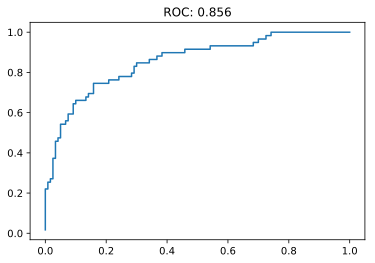

In [292]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2)

# Делаем предсказания для проверочных данных
model = xgboost.XGBClassifier(**best_params)
model.fit(X_train_train, y_train_train)
y_train_test_predict_proba = model.predict_proba(X_train_test)

# Рисуем ROC-кривую и выводим accuracy score
plot_roc_curve(y_train_test, y_train_test_predict_proba)
print("test prediction accuracy: ", accuracy_score(y_train_test, y_train_test_predict))

In [81]:
test_cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=1)

def test_model(model, X, y, n_splits=30, scoring='accuracy', n_jobs=-1):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, cv=cv,  scoring=scoring, n_jobs=n_jobs)
    print("{}:\nAccuracy:{:.5f}\nstd: {:.5f}".format(
        model.__class__.__name__,
        scores.mean(), 
        scores.std()
    ))
    return scores

In [253]:
test_model(DecisionTreeClassifier(**classifier_kwargs), X_train, y_train)

DecisionTreeClassifier:
Accuracy:0.81359
std: 0.04214


In [310]:
test_model(DecisionTreeClassifier(**classifier_kwargs), X_train[[
    'Title_Mr', 'BigFamily', 'Fare', 'Title_Officer', 'Age', 
    'Pclass2', 'Pclass_3', 'HasCabin', 'Deck_E'
]], y_train)

DecisionTreeClassifier:
Accuracy:0.82256
std: 0.05044


In [254]:
test_model(xgboost.XGBClassifier(**best_params), X_train, y_train, n_jobs=1)

XGBClassifier:
Accuracy:0.72966
std: 0.08580


In [255]:
test_model(xgboost.XGBClassifier(), X_train, y_train, n_jobs=1)

XGBClassifier:
Accuracy:0.82512
std: 0.05882


In [304]:
test_model(xgboost.XGBClassifier(), X_train[[
    'Age', 'Fare', 'Pclass2', 
    'Deck_C', 'NameLen_2', 'NameLen_4', #'Embarked_Q', 'Embarked_C',
    'FamilySize', 'HasCabin', 'Title_Mr', 'Sex'    
]], y_train, n_jobs=1)

XGBClassifier:
Accuracy:0.82516
std: 0.05918


In [258]:
test_model(xgboost.XGBClassifier(**best_params), X_train[best_features], y_train, n_jobs=1)

XGBClassifier:
Accuracy:0.74545
std: 0.06230


In [283]:
test_model(
    xgboost.XGBClassifier(**best_params_for_best_features), 
    X_train[best_features_xboost], 
    y_train, n_jobs=1
)

XGBClassifier:
Accuracy:0.76677
std: 0.07138


In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

/Users/ur001/.pyenv/versions/anaconda3-5.0.0/envs/netology1/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [312]:
test_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train)

KNeighborsClassifier:
Accuracy:0.81600
std: 0.04434


In [322]:
test_model(SGDClassifier(random_state=1), X_train, y_train)

SGDClassifier:
Accuracy:0.76640
std: 0.05890


In [336]:
test_model(SVC(C=1.6), X_train, y_train)

SVC:
Accuracy:0.82156
std: 0.05377


In [337]:
test_model(GaussianNB(), X_train, y_train)

GaussianNB:
Accuracy:0.77441
std: 0.05795


In [339]:
test_model(LogisticRegression(random_state=1), X_train, y_train)

LogisticRegression:
Accuracy:0.82412
std: 0.05492


In [340]:
test_model(
    RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2), 
    X_train, y_train
)

RandomForestClassifier:
Accuracy:0.82645
std: 0.05955


In [363]:
test_model(
    RandomForestClassifier(random_state=1, n_estimators=300, max_depth=5, min_samples_split=10, min_samples_leaf=2), 
    X_train, y_train
)

RandomForestClassifier:
Accuracy:0.82838
std: 0.04694


In [365]:
model = RandomForestClassifier(random_state=1, n_estimators=300, max_depth=5, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)
get_feature_importance(model, X_train)

,importance
feature,
Title_Mr,0.219683
Sex,0.182041
Title_Miss,0.0647514
Pclass2,0.0570825
Pclass_3,0.0549599
Title_Mrs,0.0527285
Fare,0.0508529
HasCabin,0.0453557
Age,0.0402355


In [387]:
features = [
    'Title_Mr', 'Sex', 'Title_Miss', 'Pclass2', 'Pclass_3', 'Title_Mrs', 'Fare', 'HasCabin', 'Age',
    'FamilySize', 'NameLen_4', 'Pclass_1', 'BigFamily', 'SibSp', 'AgeLte15', 'Title_Master', 'Alone'
]

test_model(
    RandomForestClassifier(random_state=1, n_estimators=150, max_depth=5, min_samples_split=10, min_samples_leaf=2), 
    X_train[features], y_train
)

RandomForestClassifier:
Accuracy:0.83413
std: 0.05174


In [ ]:
RandomForestClassifier:
Accuracy:0.83413
std: 0.05174

In [401]:
features = [
    'Title_Mr', 'Sex', 'Title_Miss', 'Pclass2', 'Pclass_3', 'Title_Mrs', 'Fare', 'HasCabin', 'Age',
    'FamilySize', 'NameLen_4', 'Pclass_1', 'BigFamily', 'SibSp', 'AgeLte15', 'Title_Master', 'Alone'
]

test_model(
    RandomForestClassifier(random_state=1, n_estimators=150, max_depth=5, min_samples_split=10, min_samples_leaf=2), 
    X_train[features], y_train
)

RandomForestClassifier:
Accuracy:0.83413
std: 0.05174


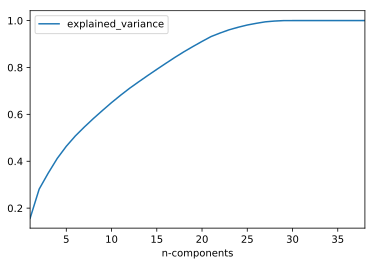

In [73]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
data = pd.DataFrame(
    [
        [i, sum(pca.explained_variance_ratio_[:i])]
        for i in range(1, X.shape[1] + 1)
    ],
    columns=['n-components', 'explained_variance']
).set_index('n-components')
data.plot();

In [74]:
X.corr().style.bar()

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection.from_model import _get_feature_importances

def get_scored_features(X, y):
    """Возвращает датафрейм feature/score с момощью SelectKBest отсортированный по score """
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X, y)
    return pd.DataFrame(
        list(zip(X_train.columns, -np.log10(selector.pvalues_))),
        columns=['feature', 'score']
    ).set_index('feature').sort_values('score', ascending=False)

def get_scored_features_by_model(X, model):
    """Возвращает датафрейм feature/score по с фичами которые модель посчитала наиболее важными для себя"""
    try:
        feature_importances = _get_feature_importances(model)
    except ValueError:
        return None
    
    return pd.DataFrame(
        list(zip(X.columns, feature_importances)),
        columns=['feature', 'score']
    ).set_index('feature').sort_values('score', ascending=False)

def plot_features(feature_scores):
    """Рисует график фич по датасету feature/score"""
    features_range = range(len(feature_scores))
    plt.bar(features_range, feature_scores.score.ravel())
    plt.xticks(features_range, feature_scores.index.ravel(), rotation='vertical')
    
# plot_features(get_scored_features(X, y))
# plot_features(get_scored_features_by_model(X, model))

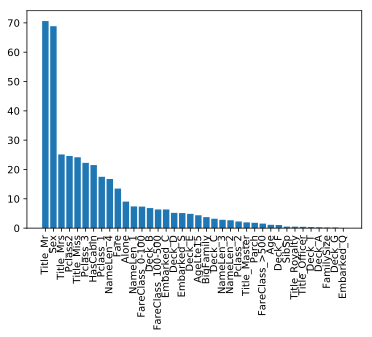

In [76]:
plot_features(get_scored_features(X_train, y_train))

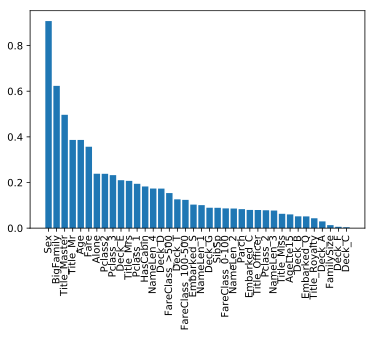

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
plot_features(get_scored_features_by_model(X_train, model))

In [79]:
def select_features_and_params_for_model(
    model, X, y, 
    features, params, 
    features_range=range(3, 25), 
    scoring='accuracy'
):
    default_score = test_model(model, X, y, scoring=scoring).mean()
    scores = []
    for n_features in features_range:
        features = best_features[:n_features]
        print('\nfeatures {}: {}'.format(n_features, ', '.join(map(str, features))))
        model_tuned, best_5_params = tune_model(model, X[features], y, params, scoring=scoring)
        print('best params:')
        print("\n".join(map(str, best_5_params)))
        score = test_model(model_tuned, X[features], y, scoring=scoring)
        score_mean, score_std = score.mean(), score.std()
        score_from, score_to = score_mean - score_std, score_mean + score_std
        scores.append((n_features, score_mean, score_from, score_to, best_5_params[0]))
    return scores

def select_features_and_params_for_model2(
    model, X, y, params, 
    features_range=range(3, 25), 
    scoring='accuracy'
):
    default_score = test_model(model, X, y, scoring=scoring).mean()
    best_features = get_scored_features_by_model(X, model).index.ravel()
    scores = []
    for n_features in features_range:
        features = best_features[:n_features]
        print('\nfeatures {}: {}'.format(n_features, ', '.join(map(str, features))))
        model_tuned, best_5_params = tune_model(model, X[features], y, params, scoring=scoring)
        print('best params:')
        print("\n".join(map(str, best_5_params)))
        score = test_model(model_tuned, X[features], y, scoring=scoring)
        score_mean, score_std = score.mean(), score.std()
        score_from, score_to = score_mean - score_std, score_mean + score_std
        scores.append((n_features, score_mean, score_from, score_to, best_5_params[0]))
    return scores

In [82]:
# 12 — best
best_features = get_scored_features(X_train, y_train).index.ravel()
model = DecisionTreeClassifier(random_state=1)
params = {
    'max_depth': list(range(2, 10)),
    "min_samples_split": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4]        
}

model, _ = tune_model(model, X_train, y_train, params)
print(model)

scores = select_features_and_params_for_model(model, X_train, y_train, best_features, params, range(3, 30))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
DecisionTreeClassifier:
Accuracy:0.81248
std: 0.04205

features 3: Title_Mr, Sex, Title_Mrs
best params:
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6}
DecisionTreeClassifier:
Accuracy:0.78708
std: 0.05031

features 4: Title_Mr, Sex, Title_Mrs, Pclass2
best params:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_

DecisionTreeClassifier:
Accuracy:0.83056
std: 0.06518

features 19: Title_Mr, Sex, Title_Mrs, Pclass2, Title_Miss, Pclass_3, HasCabin, Pclass_1, NameLen_4, Fare, Alone, NameLen_1, FareClass_0-100, Deck_B, FareClass_100-500, Embarked_C, Deck_D, Embarked_S, Deck_E
best params:
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6}
DecisionTreeClassifier:
Accuracy:0.83394
std: 0.06315

features 20: Title_Mr, Sex, Title_Mrs, Pclass2, Title_Miss, Pclass_3, HasCabin, Pclass_1, NameLen_4, Fare, Alone, NameLen_1, FareClass_0-100, Deck_B, FareClass_100-500, Embarked_C, Deck_D, Embarked_S, Deck_E, AgeLte15
best params:
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_s

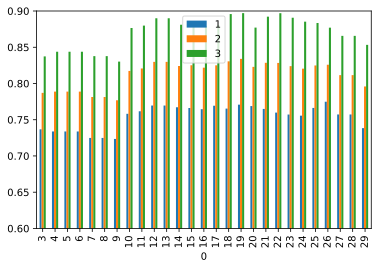

In [91]:
feature_n, score_mean, score_from, score_to, best_params = zip(*scores)
pd.DataFrame(list(zip(feature_n, score_from, score_mean, score_to))).set_index(0).plot(kind='bar', ylim=[0.6, 0.9])

In [92]:
model = DecisionTreeClassifier(random_state=1)
params = {
    'max_depth': list(range(2, 10)),
    "min_samples_split": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4]        
}
model, _ = tune_model(model, X_train, y_train, params)
print(model)

scores = select_features_and_params_for_model(model, X_train, y_train, best_features, params, range(3, 30))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
DecisionTreeClassifier:
Accuracy:0.81248
std: 0.04205

features 3: Fare, Age, NameLen_2
best params:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6}
DecisionTreeClassifier:
Accuracy:0.67642
std: 0.07709

features 4: Fare, Age, NameLen_2, FamilySize
best params:
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split

DecisionTreeClassifier:
Accuracy:0.81074
std: 0.06673

features 19: Fare, Age, NameLen_2, FamilySize, Embarked_S, SibSp, Pclass_2, Title_Mr, Pclass2, Parch, NameLen_1, HasCabin, Title_Miss, Embarked_Q, Sex
best params:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}
DecisionTreeClassifier:
Accuracy:0.81074
std: 0.06673

features 20: Fare, Age, NameLen_2, FamilySize, Embarked_S, SibSp, Pclass_2, Title_Mr, Pclass2, Parch, NameLen_1, HasCabin, Title_Miss, Embarked_Q, Sex
best params:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'max_depth': 4, 'min_samples_leaf': 1, 'min_sampl

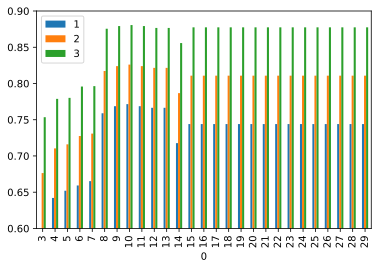

In [95]:
feature_n, score_mean, score_from, score_to, best_params = zip(*scores)
pd.DataFrame(list(zip(feature_n, score_from, score_mean, score_to))).set_index(0).plot(kind='bar', ylim=[0.6, 0.9])

In [97]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = dict(n_neighbors=[3,4,5])

model, _ = tune_model(model, X_train, y_train, params)
print(model)

scores = select_features_and_params_for_model(model, X_train, y_train, best_features, params, range(3, 30))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
KNeighborsClassifier:
Accuracy:0.81600
std: 0.04434

features 3: Fare, Age, NameLen_2
best params:
{'n_neighbors': 5}
{'n_neighbors': 3}
{'n_neighbors': 4}
KNeighborsClassifier:
Accuracy:0.68592
std: 0.08094

features 4: Fare, Age, NameLen_2, FamilySize
best params:
{'n_neighbors': 4}
{'n_neighbors': 5}
{'n_neighbors': 3}
KNeighborsClassifier:
Accuracy:0.71828
std: 0.06948

features 5: Fare, Age, NameLen_2, FamilySize, Embarked_S
best params:
{'n_neighbors': 4}
{'n_neighbors': 5}
{'n_neighbors': 3}
KNeighborsClassifier:
Accuracy:0.69585
std: 0.05653

features 6: Fare, Age, NameLen_2, FamilySize, Embarked_S, SibSp
best params:
{'n_neighbors': 5}
{'n_neighbors': 3}
{'n_neighbors': 4}
KNeighborsClassifier:
Accuracy:0.71743
std: 0.06156

features 7: Fare, Age, NameLen_2, FamilySize, Embarked_S, SibSp, Pclass_2
best params:
{'n_n

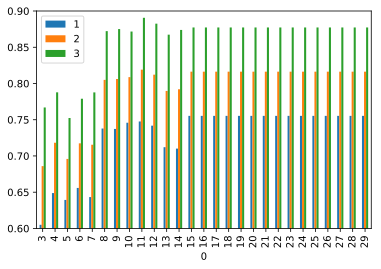

In [98]:
feature_n, score_mean, score_from, score_to, best_params = zip(*scores)
pd.DataFrame(list(zip(feature_n, score_from, score_mean, score_to))).set_index(0).plot(kind='bar', ylim=[0.6, 0.9])